Goal : experiment with beautiful soup and get TV shows recommendations


Tutorial : https://medium.com/@nishantsahoo/which-movie-should-i-watch-5c83a3c0f5b1

In [63]:
#Basic beautiful soup

import requests # of course i want all the page, why load more 
from bs4 import BeautifulSoup
url = "https://www.rollingstone.com/tv-movies/tv-movie-lists/best-tv-shows-of-all-time-1234598313/the-good-fight-3-1234598414/"
url2="https://www.rollingstone.com/tv-movies/tv-movie-lists/best-tv-shows-of-all-time-1234598313/jeopardy-2-1234599051"
ourUrl =requests.get(url).content
ourUrl2=requests.get(url2).content
soup = BeautifulSoup(ourUrl, "lxml")
soup2=BeautifulSoup(ourUrl2, "lxml")
print(soup.find('title').text)

Best TV Shows of All Time


General structure of the website https://www.rollingstone.com/tv-movies/tv-movie-lists/best-tv-shows-of-all-time-1234598313/what-we-do-in-the-shadows-3-1234598401/

In [68]:
"""
<div id="pmc-gallery-vertical">
    <div class="c-gallery-vertical-loader u-gallery-app-shell-loader">
        <ul class="pmc-fallback-list-items lrv-a-unstyle-list lrv-u-margin-t-2">
            <li class="pmc-fallback-list-item-wrap lrv-u-margin-b-2">
			<article class="pmc-fallback-list-item">
	        <h2>&#8216;What We Do in the Shadows&#8217;</h2>
                <div class="pmc-not-a-paywall">
                    <p class="paragraph"></p>
                </div>
            </article>
            </li>

            <li>
            </li>
"""

'\n<div id="pmc-gallery-vertical">\n    <div class="c-gallery-vertical-loader u-gallery-app-shell-loader">\n        <ul class="pmc-fallback-list-items lrv-a-unstyle-list lrv-u-margin-t-2">\n            <li class="pmc-fallback-list-item-wrap lrv-u-margin-b-2">\n\t\t\t<article class="pmc-fallback-list-item">\n\t        <h2>&#8216;What We Do in the Shadows&#8217;</h2>\n                <div class="pmc-not-a-paywall">\n                    <p class="paragraph"></p>\n                </div>\n            </article>\n            </li>\n\n            <li>\n            </li>\n'

In [69]:
#Scraper

i=100
showList=soup.findAll('li', attrs={'class':"pmc-fallback-list-item-wrap lrv-u-margin-b-2"})
for item in showList:
    article=item.find('article', attrs={'class':'pmc-fallback-list-item'})
    title=article.find('h2')
    print(str(i)+'. '+str(title.get_text()))
    i-=1

showList=soup2.findAll('li', attrs={'class':"pmc-fallback-list-item-wrap lrv-u-margin-b-2"})
for item in showList:
    title=item.find('h2')
    print(str(i)+'. '+str(title.get_text()))
    i-=1




100. ‘What We Do in the Shadows’
99. ‘Oz’
98. ‘The Good Fight’
97. ‘The Odd Couple’
96. ‘Rick and Morty’ 
95. ‘Squid Game’
94. ‘NewsRadio’ 
93. ‘The Rockford Files’ 
92. ‘The Muppet Show’  
91. ‘The Tonight Show Starring Johnny Carson’  
90. ‘The Wonder Years’ 
89. ‘The Carol Burnett Show’
88. ‘The Crown’ 
87. ‘The Kids in the Hall’  
86. ‘The Bob Newhart Show’ 
85. ‘Orange Is the New Black’
84. ‘Fargo’  
83. ‘I’m Alan Partridge’ 
82. ‘Party Down’ 
81. ‘It’s Always Sunny in Philadelphia’  
80. ‘Band of Brothers’ 
79. ‘Mr. Show with Bob and David’
78. ‘Sex and the City’
77. ‘The Jeffersons’ 
76. ‘Justified’ 
75. ‘Frasier’
74. ‘The Honeymooners’
73. ‘Buffy the Vampire Slayer’ 
72. ‘Good Times’  
71. ‘Better Things’ 
70. ‘SCTV’  
69. ‘Chappelle’s Show’  
68. ‘Fawlty Towers’
67. ‘NYPD Blue’
66. ‘The Daily Show With Jon Stewart’
65. ‘Girls’
64. ‘The Golden Girls’
63. ‘South Park’ 
62. ‘The Dick Van Dyke Show’
61. ‘The Underground Railroad’ 
60. ‘Taxi’
59. ‘Key & Peele’
58. ‘Six Feet Under’


In [79]:
#Get most cited shows in major websites
import urllib3

# website name: [url, first html tag, second html tag, useragent if applicable]
websites={
    'IMDB': ['https://www.imdb.com/chart/toptv/', ('li',{'class':"ipc-metadata-list-summary-item"}),('h3', {'class':"ipc-title__text"}), 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/143.0.0.0 Safari/537.36 Edg/143.0.0.0'],
    'Rotten Tomatoes': ['https://editorial.rottentomatoes.com/guide/popular-tv-shows/',('div', {'class':"col-sm-18 col-full-xs countdown-item-content"}), ('a',""), ""],
    'Variety':['https://variety.com/lists/greatest-tv-shows-of-all-time/',('li',{'class':"pmc-fallback-list-item-wrap lrv-u-margin-b-2"}),('h2',"")," "],
    'Wikipedia':['https://en.wikipedia.org/wiki/List_of_television_shows_considered_the_best',('tr', ''), ('i',"")," "],
    'Rolling Stone':["https://www.rollingstone.com/tv-movies/tv-movie-lists/best-tv-shows-of-all-time-1234598313/jeopardy-2-1234599051", ('article', {'class':'pmc-fallback-list-item'}), ('h2',""),""]
}
shows={}

def get_best_shows(name):
    print('Processing recommendations from ' + name)
    url=websites[name][0]
    listItem=websites[name][1]
    title_html=websites[name][2]
    headers=websites[name][3]
    ourUrl=urllib3.PoolManager().request('GET', url, headers={'User-Agent':headers}).data #many urls so efficiency -> PoolManager
    soup = BeautifulSoup(ourUrl, "lxml")
    showList=soup.findAll(listItem[0], attrs=listItem[1])
    for item in showList:
        if item.find(title_html[0], attrs=title_html[1])!= None :
            title=str(item.find(title_html[0], attrs=title_html[1]).get_text())
            if title in shows:
                shows[title].append(name)
            else :
                shows[title]=[name]
    return None


def sort_len(entry):
    return len(shows[entry])


for name in websites :
    get_best_shows(name)

print('Best shows ever:')
print(shows)
shows_sorted=sorted(shows,reverse=True, key=sort_len)
print(shows_sorted)

Processing recommendations from IMDB
Processing recommendations from Rotten Tomatoes
Processing recommendations from Variety
Processing recommendations from Wikipedia
Processing recommendations from Rolling Stone
Best shows ever:
{'Breaking Bad': ['IMDB', 'Variety', 'Wikipedia'], 'Planet Earth II': ['IMDB'], 'Planet Earth': ['IMDB'], 'Band of Brothers': ['IMDB', 'Wikipedia'], 'Chernobyl': ['IMDB'], 'The Wire': ['IMDB', 'Variety', 'Wikipedia'], 'Avatar: The Last Airbender': ['IMDB'], 'The Sopranos': ['IMDB', 'Variety', 'Wikipedia'], 'Blue Planet II': ['IMDB'], 'Cosmos': ['IMDB', 'IMDB'], 'Our Planet': ['IMDB'], 'Game of Thrones': ['IMDB', 'Variety', 'Wikipedia'], 'Bluey': ['IMDB'], 'The World at War': ['IMDB'], 'Fullmetal Alchemist: Brotherhood': ['IMDB'], 'Attack on Titan': ['IMDB'], 'Life': ['IMDB'], 'The Last Dance': ['IMDB'], 'The Twilight Zone': ['IMDB', 'Variety', 'Wikipedia'], 'Rick and Morty': ['IMDB'], 'The Vietnam War': ['IMDB'], 'Sherlock': ['IMDB'], 'Batman: The Animated Ser

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Breaking Bad', 'The Wire', 'The Sopranos', 'Game of Thrones', 'The Twilight Zone'] [3, 3, 3, 3, 3]


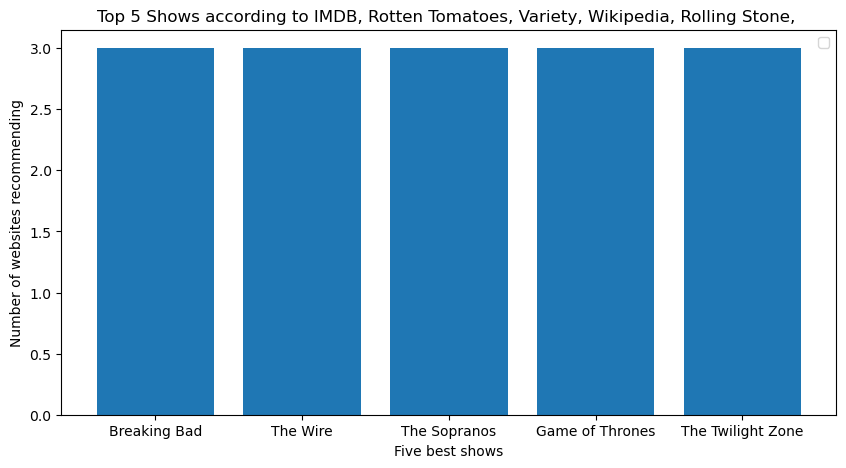

In [80]:
import matplotlib.pyplot as plt
top5=shows_sorted[:5]
nb_recs=[]
for show in top5:
    nb_recs.append(len(shows[show]))
print(top5,nb_recs)
plt.figure(figsize=(10,5))
plt.bar(top5,nb_recs)
plt.xlabel('Five best shows')
plt.ylabel('Number of websites recommending')
sources=""
for source in websites:
    sources+= source + ', ' 
plt.title('Top 5 Shows according to '+sources)
plt.legend()
plt.show()